In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import acquire
from prepare import prep_store_data
import warnings
warnings.filterwarnings("ignore")

from acquire import get_store_data

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [2]:
df = get_store_data()
df.head()

Data is cached. Reading from .csv files
Items data acquired...
Stores data acquired...
Sales data acquired...
Acquisition complete


,sale_amount,sale_date,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
3,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
4,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Tuesday,10.92
2013-01-01 00:00:00+00:00,26.0,211817,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,January,Tuesday,218.40
2013-01-01 00:00:00+00:00,27.0,832657,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,January,Tuesday,125.55
2013-01-01 00:00:00+00:00,54.0,213643,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,8,TX,78232,January,Tuesday,453.60
2013-01-01 00:00:00+00:00,35.0,215469,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,9,TX,78221,January,Tuesday,294.00


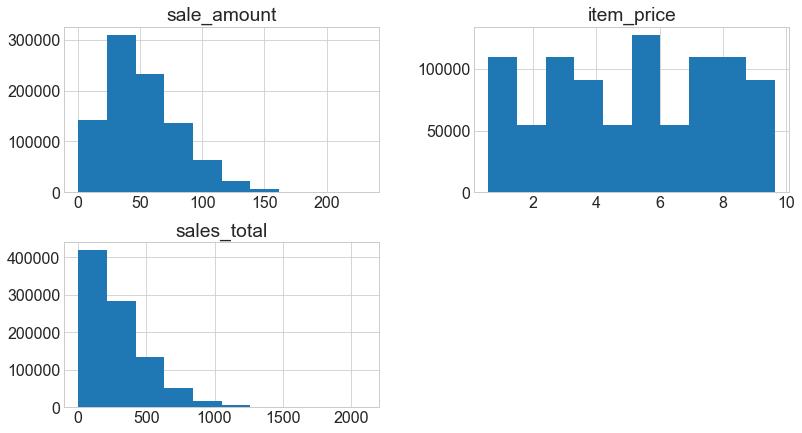

In [3]:
df = prep_store_data(df)
df.head()

# STORE DATASET

### Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

### For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [4]:
df.groupby(['sale_date']).sales_total.sum()

sale_date
2013-01-01 00:00:00+00:00     73844.01
2013-01-02 00:00:00+00:00     73570.58
2013-01-03 00:00:00+00:00     78169.48
2013-01-04 00:00:00+00:00     84467.73
2013-01-05 00:00:00+00:00     87621.85
                               ...    
2017-12-27 00:00:00+00:00    109151.15
2017-12-28 00:00:00+00:00    117377.49
2017-12-29 00:00:00+00:00    126541.84
2017-12-30 00:00:00+00:00    134903.07
2017-12-31 00:00:00+00:00    140905.74
Name: sales_total, Length: 1826, dtype: float64

<AxesSubplot:xlabel='sale_date'>

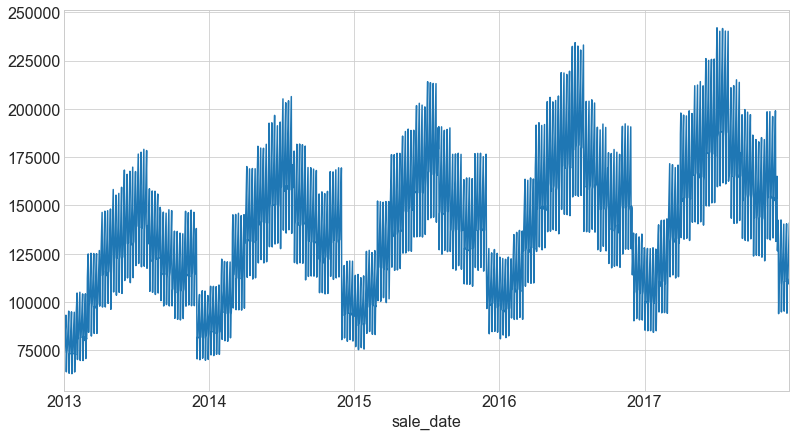

In [5]:
# here, we aggregate by sales_total and sale_date--results in a solitary date per observation
df.groupby(['sale_date']).sales_total.sum().plot()

In [6]:
df.shape

(913000, 16)

In [7]:
df.index.max(), df.index.min(), df.index.max() - df.index.min()

(Timestamp('2017-12-31 00:00:00+0000', tz='UTC'),
 Timestamp('2013-01-01 00:00:00+0000', tz='UTC'),
 Timedelta('1825 days 00:00:00'))

In [8]:
# df.isna().sum()
# NO NULLS

In [10]:
first_sale = df.reset_index().groupby(['store_id','item_id']).sale_date.min()
first_sale.head()

store_id  item_id
1         1         2013-01-01 00:00:00+00:00
          2         2013-01-01 00:00:00+00:00
          3         2013-01-01 00:00:00+00:00
          4         2013-01-01 00:00:00+00:00
          5         2013-01-01 00:00:00+00:00
Name: sale_date, dtype: datetime64[ns, UTC]

In [11]:
# get the unique dates from first_sale_per_storeitem
first_sale.unique() # if there's only one unique value, then YES!

<DatetimeArray>
['2013-01-01 00:00:00+00:00']
Length: 1, dtype: datetime64[ns, UTC]

- This aspect of explo is continued in Adam's Prepare lesson

## Splitting

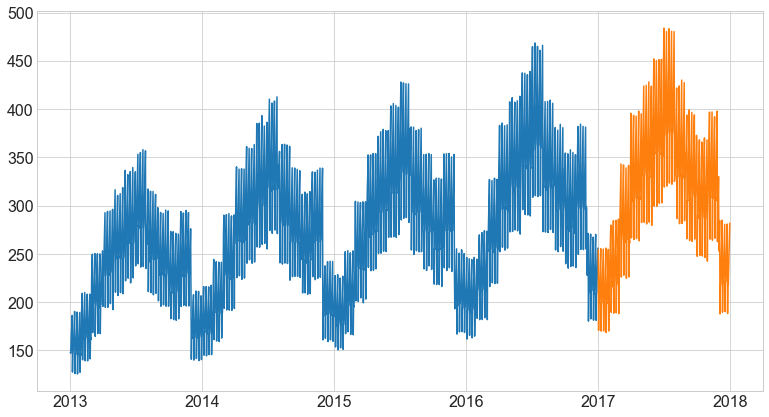

In [12]:
train = df[:'2016'] # includes 2016
test = df['2017']

train_daily = train.resample('D').sales_total.mean().reset_index()
#train_by_date.plot(x='sale_date', y='sale_amount')

test_daily = test.resample('D').sales_total.mean().reset_index()
#test_by_date.plot(x='sale_date', y='sale_amount')

plt.plot(train_daily.sale_date, train_daily.sales_total)
plt.plot(test_daily.sale_date, test_daily.sales_total)
plt.show()

- ok, i did a human-based split up to 2017 (pre-2017 is train, 2017 is test)

In [13]:
train.shape, test.shape

((730500, 16), (182500, 16))

In [14]:
train.head(1)

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Tuesday,10.92


In [15]:
train.resample('D').sales_total.mean()
# pd.DataFrame(train.resample('D').sales_total.mean())
# reset index not really required
# this is pretty much a one-dimensional np array

sale_date
2013-01-01 00:00:00+00:00    147.68802
2013-01-02 00:00:00+00:00    147.14116
2013-01-03 00:00:00+00:00    156.33896
2013-01-04 00:00:00+00:00    168.93546
2013-01-05 00:00:00+00:00    175.24370
                               ...    
2016-12-27 00:00:00+00:00    207.31578
2016-12-28 00:00:00+00:00    210.62788
2016-12-29 00:00:00+00:00    226.44370
2016-12-30 00:00:00+00:00    240.06728
2016-12-31 00:00:00+00:00    256.01862
Freq: D, Name: sales_total, Length: 1461, dtype: float64

In [16]:
# maybe use a resample in the future cases, to force you to deal with missing data
# train_by_date = train.resample('D').sales_total.mean().reset_index()
# train_by_date = train.groupby(['sale_date']).sales_total.mean().reset_index()
train_daily = pd.DataFrame(train.resample('D').sales_total.mean())
train_daily.head()

,sales_total
sale_date,
2013-01-01 00:00:00+00:00,147.68802
2013-01-02 00:00:00+00:00,147.14116
2013-01-03 00:00:00+00:00,156.33896
2013-01-04 00:00:00+00:00,168.93546
2013-01-05 00:00:00+00:00,175.24370


In [17]:
#train_by_date = train_by_date.set_index("sale_date").sort_index()

In [18]:
# test_by_date = test.groupby(['sale_date']).sales_total.mean().reset_index()
# test_by_date = test_by_date.set_index('sale_date').sort_index()
test_daily = pd.DataFrame(train.resample('D').sales_total.mean())
test_daily.head()

,sales_total
sale_date,
2013-01-01 00:00:00+00:00,147.68802
2013-01-02 00:00:00+00:00,147.14116
2013-01-03 00:00:00+00:00,156.33896
2013-01-04 00:00:00+00:00,168.93546
2013-01-05 00:00:00+00:00,175.24370


<AxesSubplot:xlabel='sale_date'>

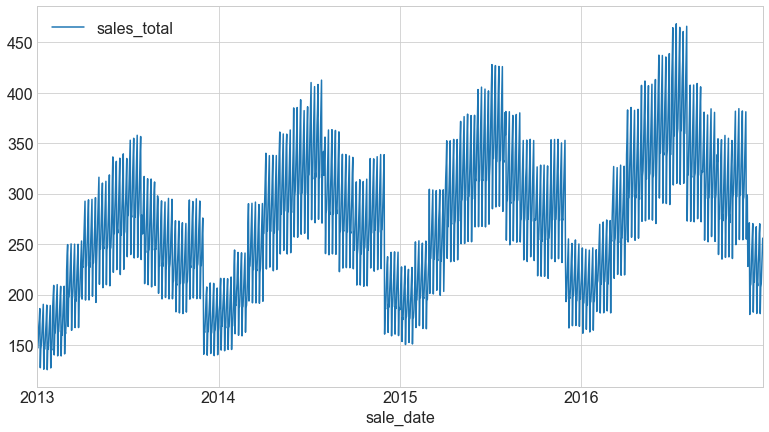

In [19]:
train_daily.plot()

<AxesSubplot:xlabel='day', ylabel='sales_total'>

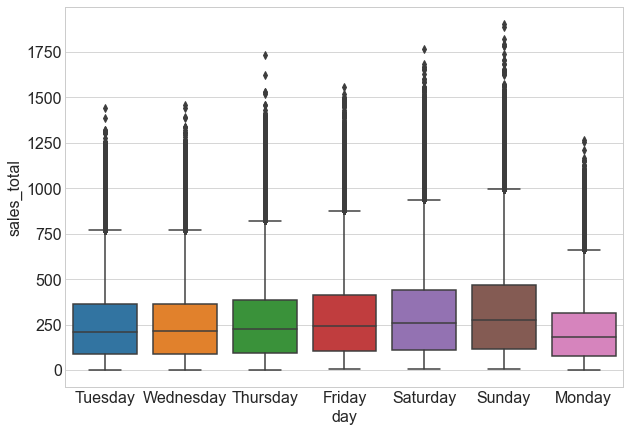

In [51]:
plt.figure(figsize=(10,7))
sns.boxplot(data = train, x= 'day', y= 'sales_total')#,whis=100)

In [21]:
train.groupby('day').sum()

,sale_amount,sale_id,item_id,item_price,item_upc12,item_upc14,store_id,store_zipcode,sales_total
day,,,,,,,,,
Friday,5587425.0,47685335500,2664750,539261.8,24919987979315924,24919987979315924,574750,8174491600,3.003164e+07
Monday,4173785.0,47457124000,2652000,536681.6,24800753587070528,24800753587070528,572000,8135379200,2.244521e+07
Saturday,5934675.0,47685440000,2664750,539261.8,24919987979316112,24919987979316112,574750,8174491600,3.191152e+07
Sunday,6269009.0,47457020000,2652000,536681.6,24800753587070376,24800753587070376,572000,8135379200,3.370228e+07
Thursday,5229237.0,47685231000,2664750,539261.8,24919987979315864,24919987979315864,574750,8174491600,2.811234e+07
Tuesday,4883776.0,47685022000,2664750,539261.8,24919987979316064,24919987979316064,574750,8174491600,2.625784e+07
Wednesday,4892865.0,47685126500,2664750,539261.8,24919987979315900,24919987979315900,574750,8174491600,2.630280e+07


<AxesSubplot:title={'center':'2 week average'}, xlabel='sale_date'>

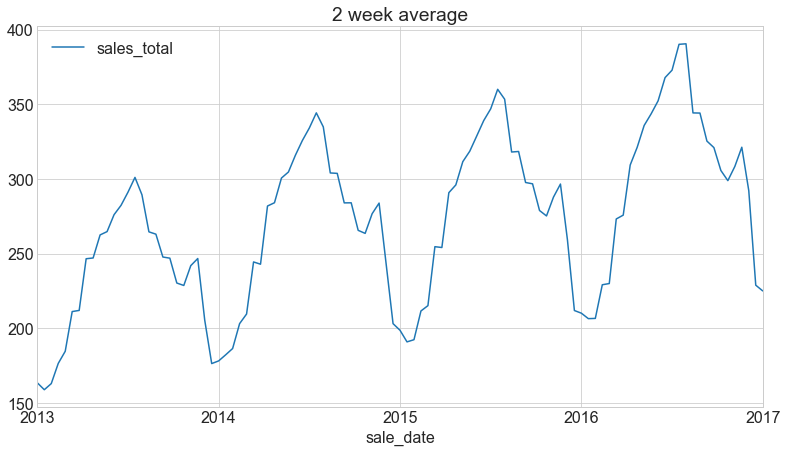

In [22]:
train_daily.resample('2W').mean().plot(title='2 week average')

<AxesSubplot:title={'center':'1 month average'}, xlabel='sale_date'>

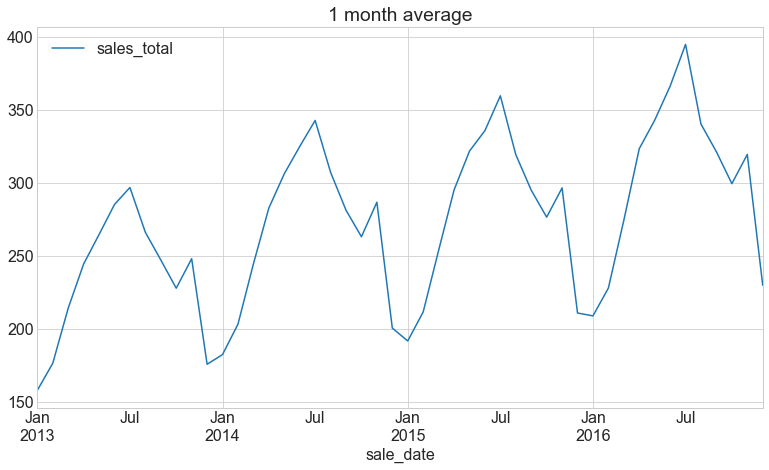

In [23]:
train_daily.resample('1M').mean().plot(title='1 month average')

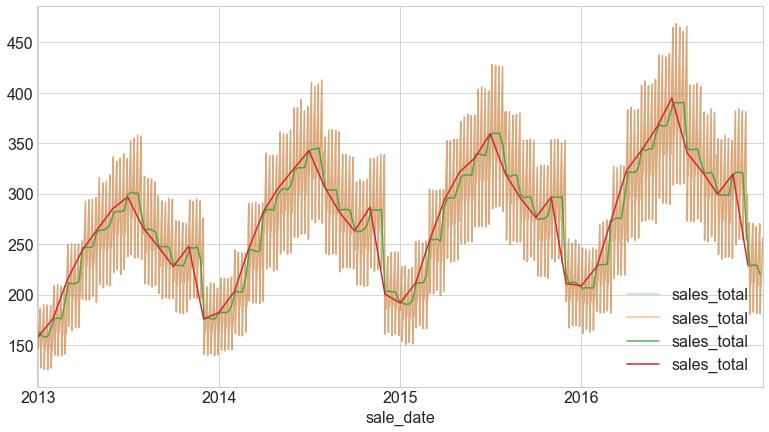

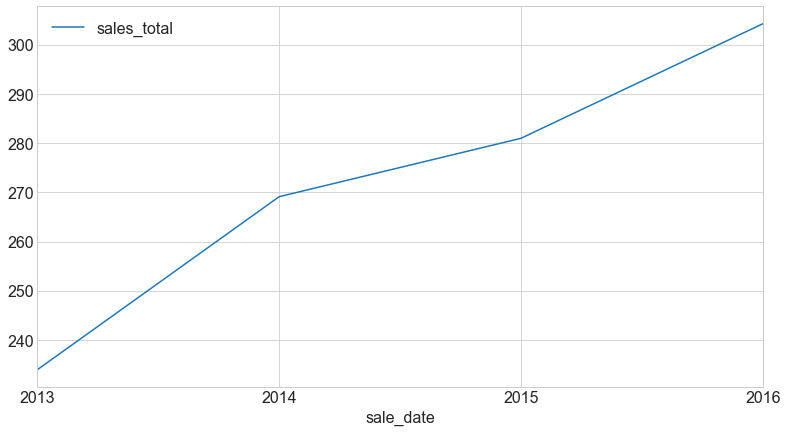

In [24]:
ax = train_daily.plot(alpha=.3, label='Hourly')
train_daily.resample('D').mean().plot(ax=ax, alpha=.5, label='Daily')
train_daily.resample('W').mean().plot(ax=ax, alpha=.8, label='Weekly')
train_daily.resample('M').mean().plot(ax=ax, label='Monthly')
train_daily.resample('Y').mean().plot(label='Yearly')
ax.legend(loc = 'lower right')

- amazing plot

Text(0.5, 1.0, 'Mean sales_total by month')

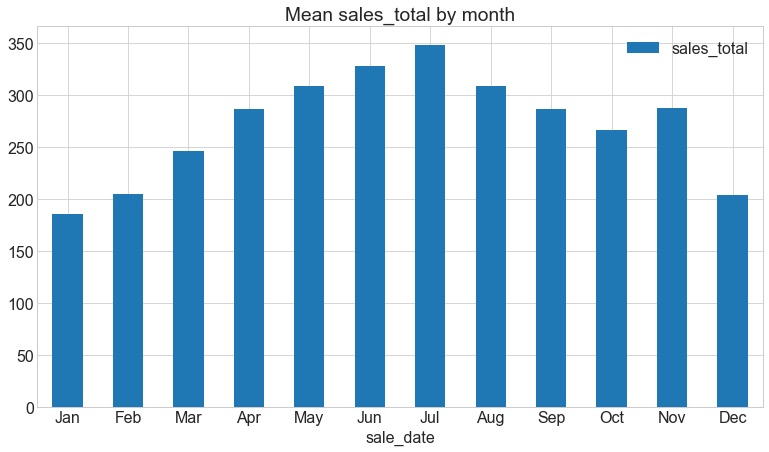

In [25]:
# Plot mean sales by month (bar plot)
ax = train_daily.groupby(train_daily.index.strftime('%m-%b')).mean().plot.bar()
# the following code selects the part of the label string to show
# helps avoid confusion--e.g. 05-May is May, not May 5th
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0);
plt.title('Mean sales_total by month')

Text(0.5, 1.0, 'Mean sales_total by month, boxplot')

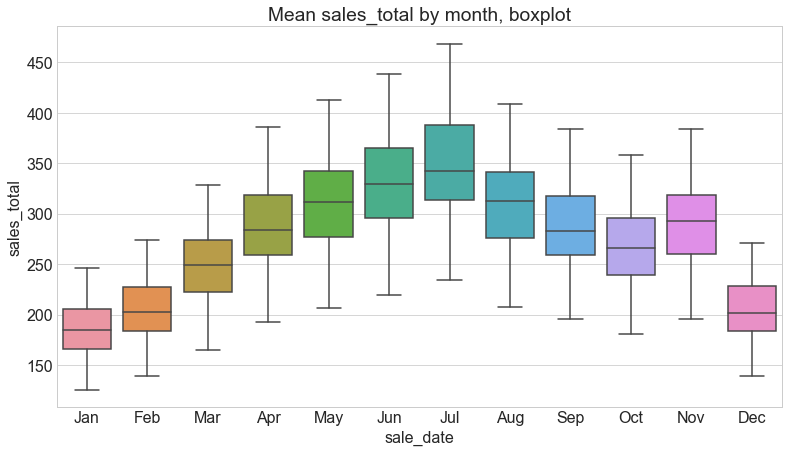

In [26]:
# boxplot for each month
ax = sns.boxplot(data =train_daily, x = train_daily.index.strftime('%m-%b'), y = train_daily['sales_total'])  # (train_by_date.index.strftime('%m-%b')) diff. month format
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0);
plt.title('Mean sales_total by month, boxplot')


In [27]:
train_daily.head()

,sales_total
sale_date,
2013-01-01 00:00:00+00:00,147.68802
2013-01-02 00:00:00+00:00,147.14116
2013-01-03 00:00:00+00:00,156.33896
2013-01-04 00:00:00+00:00,168.93546
2013-01-05 00:00:00+00:00,175.24370


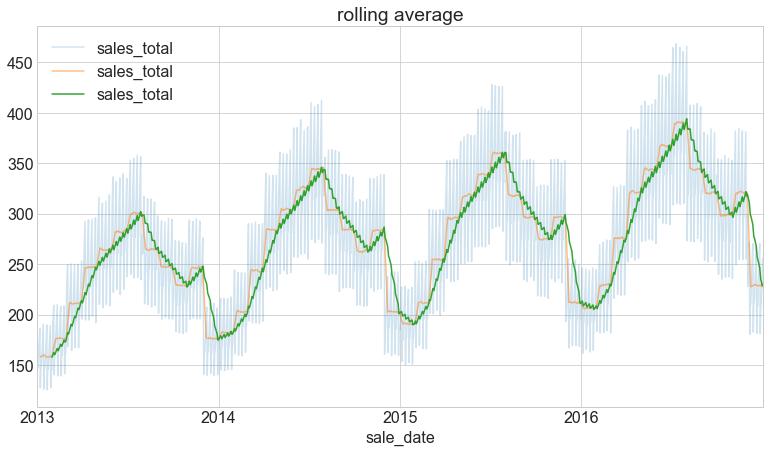

In [28]:
# why aren't these three plots showing on one single chart? thank you adam
ax = train_daily.plot(alpha=.2, label='Daily')
train_daily.resample('D').mean().rolling(7).mean().plot(ax=ax,alpha=.5, label='1 week')
train_daily.resample('D').mean().rolling(30).mean().plot(ax=ax,alpha=8, label='30 days')
ax.legend()
plt.title('rolling average');

<AxesSubplot:title={'center':'Avg month-to-month change in sales'}, xlabel='sale_date'>

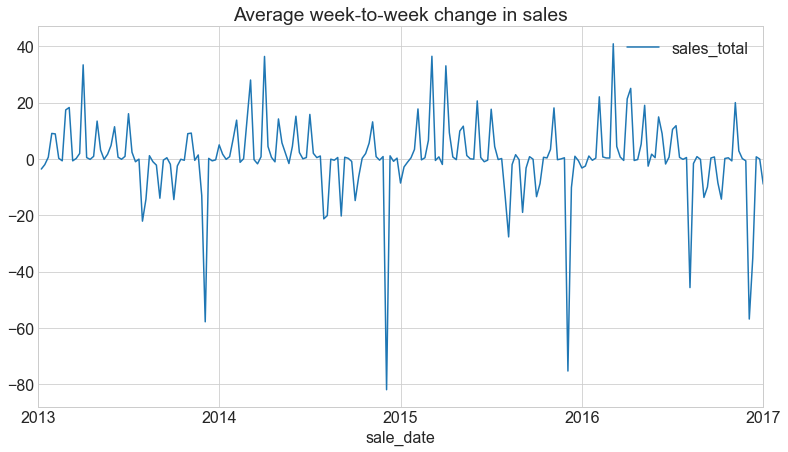

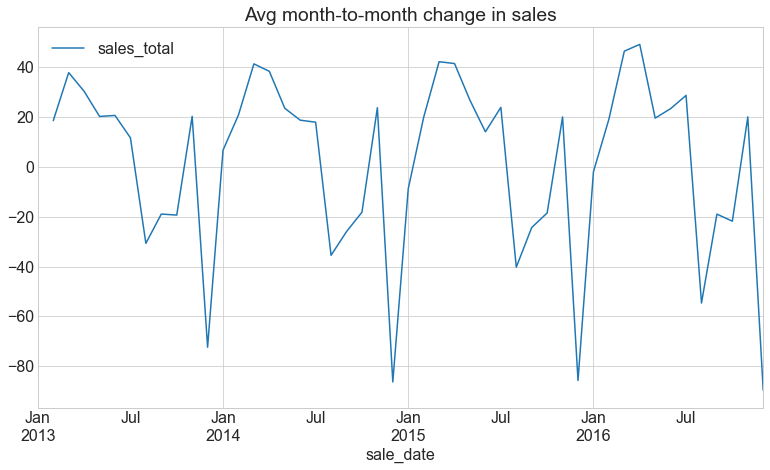

In [29]:
train_daily.resample('W').mean().diff().plot(title='Average week-to-week change in sales')
train_daily.resample('M').mean().diff().plot(title='Avg month-to-month change in sales')

- interesting pattern here to investigate

- this looks like it has a pattern, but is this something i can dive into further?

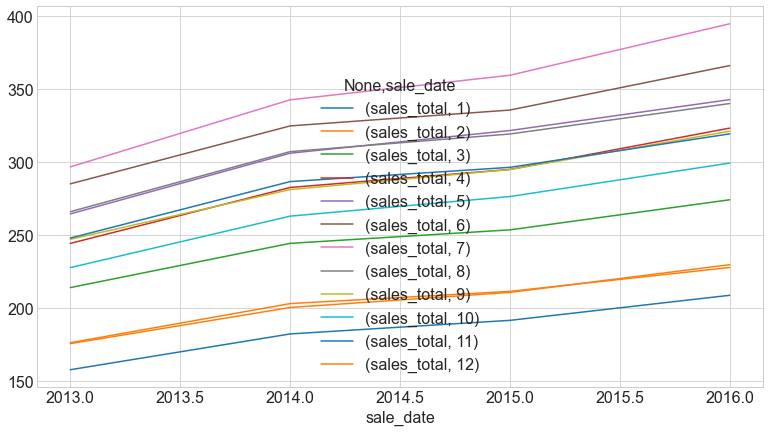

In [30]:
train_daily.groupby([train_daily.index.year, train_daily.index.month]).mean().unstack(1).plot()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=0);



In [31]:
train_daily.head()

,sales_total
sale_date,
2013-01-01 00:00:00+00:00,147.68802
2013-01-02 00:00:00+00:00,147.14116
2013-01-03 00:00:00+00:00,156.33896
2013-01-04 00:00:00+00:00,168.93546
2013-01-05 00:00:00+00:00,175.24370


<AxesSubplot:xlabel='sale_date'>

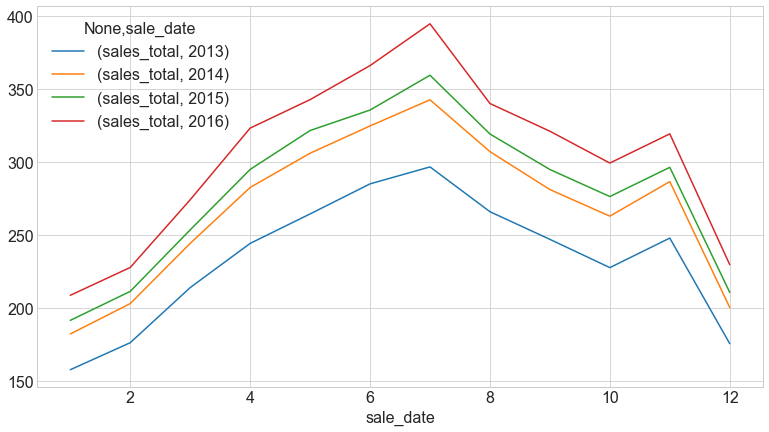

In [32]:
# train_daily = train.resample('D').sales_total.mean().reset_index() # as defined above


train_daily.groupby([train_daily.index.year, train_daily.index.month]).mean().unstack(0).plot()

In [33]:
# table = train_daily.groupby([train_daily.index.year, train_daily.index.month]).mean().unstack()
# table

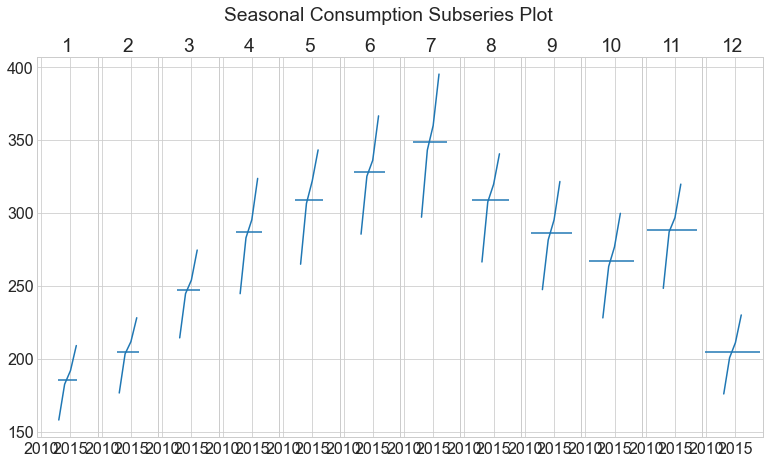

In [34]:
y = train.resample('D').sales_total.mean()

table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Consumption Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

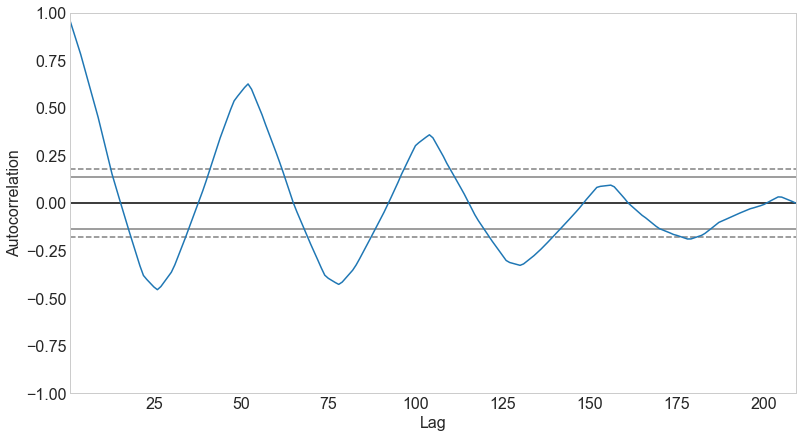

In [35]:
pd.plotting.autocorrelation_plot(train_daily.sales_total.resample('W').mean())

# Consider analyzing by store

In [36]:
train.head()

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,January,Tuesday,10.92
2013-01-01 00:00:00+00:00,26.0,211817,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,January,Tuesday,218.40
2013-01-01 00:00:00+00:00,27.0,832657,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,January,Tuesday,125.55
2013-01-01 00:00:00+00:00,54.0,213643,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,8,TX,78232,January,Tuesday,453.60
2013-01-01 00:00:00+00:00,35.0,215469,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,9,TX,78221,January,Tuesday,294.00


In [37]:

train.store_id.value_counts()

1     73050
2     73050
3     73050
4     73050
5     73050
6     73050
7     73050
8     73050
9     73050
10    73050
Name: store_id, dtype: int64

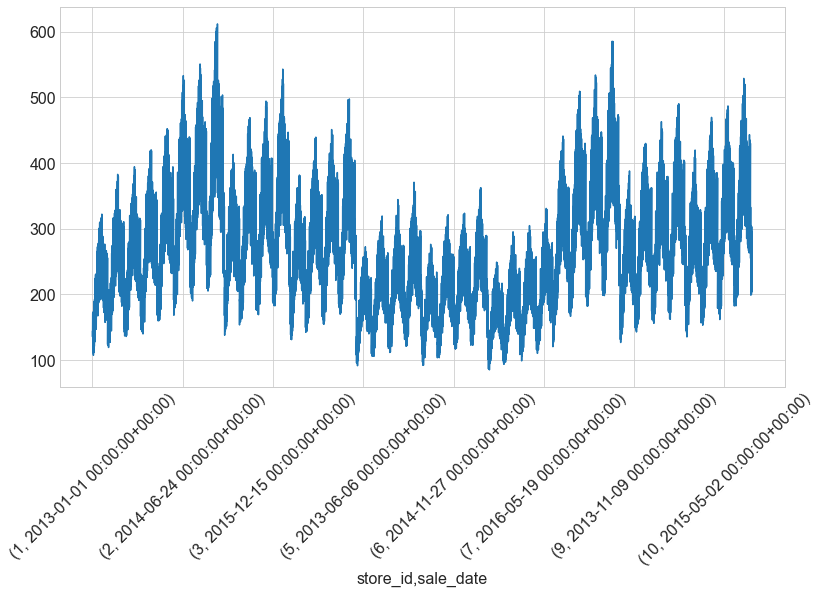

In [38]:
# train_daily = train.resample('D').sales_total.mean().reset_index() # as defined above
# train.groupby(['store_id']).sales_total.mean().plot()#.unstack(1).plot()
# train_daily.groupby([train_daily.index.year, train_daily.index.month]).mean().unstack(0).plot()


train.groupby(['store_id']).resample('D').sales_total.mean().plot()
plt.xticks(rotation=45);

Text(0.5, 1.0, 'Sales by Store, Seasonality')

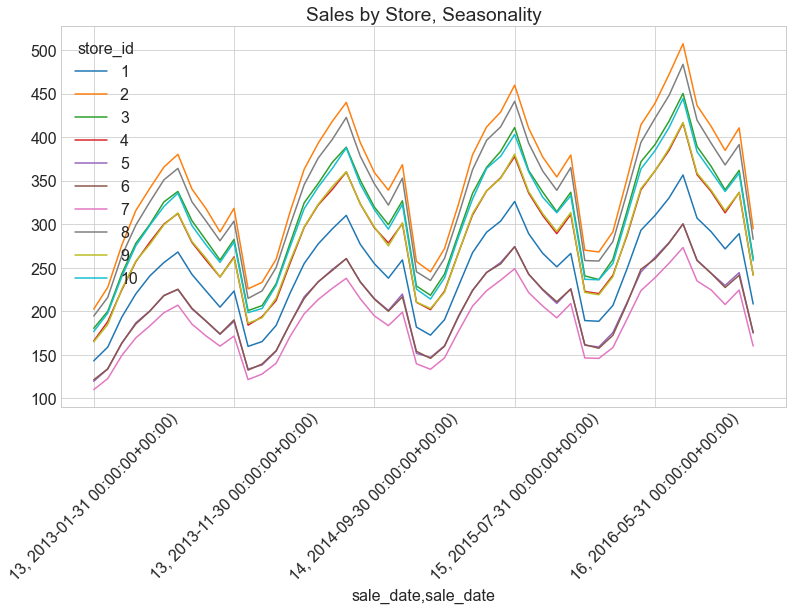

In [39]:
ax = train.groupby([train.store_id,train.index.year]).resample('M').sales_total.mean().unstack(0).plot()
ax.set_xticklabels([t.get_text()[3:] for t in ax.get_xticklabels()], rotation=45);
plt.title('Sales by Store, Seasonality')

# plt.xticks(np.arange(1,48),rotation=45);

### Lag plot

Text(0.5, 1.0, 'Lag plot with lag = 1')

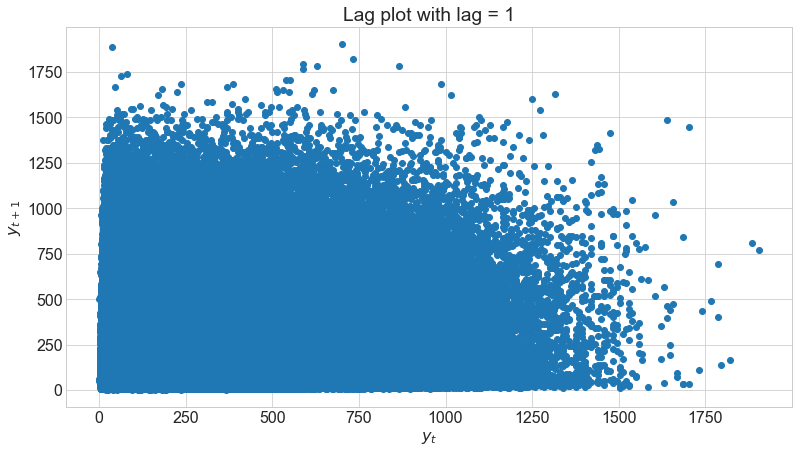

In [40]:
plt.scatter(train.sales_total, train.sales_total.shift(-1))
plt.xlabel('$y_t$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag = 1')

In [41]:
train_daily.head()

,sales_total
sale_date,
2013-01-01 00:00:00+00:00,147.68802
2013-01-02 00:00:00+00:00,147.14116
2013-01-03 00:00:00+00:00,156.33896
2013-01-04 00:00:00+00:00,168.93546
2013-01-05 00:00:00+00:00,175.24370


Text(0.5, 1.0, 'Lag plot with lag = 1, Resampled for Daily')

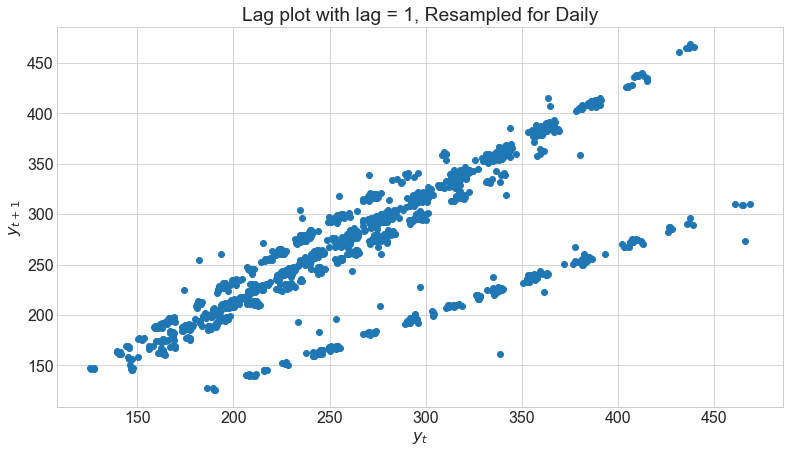

In [42]:
plt.scatter(train_daily, train_daily.shift(-1))
plt.xlabel('$y_t$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag = 1, Resampled for Daily')

- what do the many straight, highly correlated lines refer to? seasons?

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

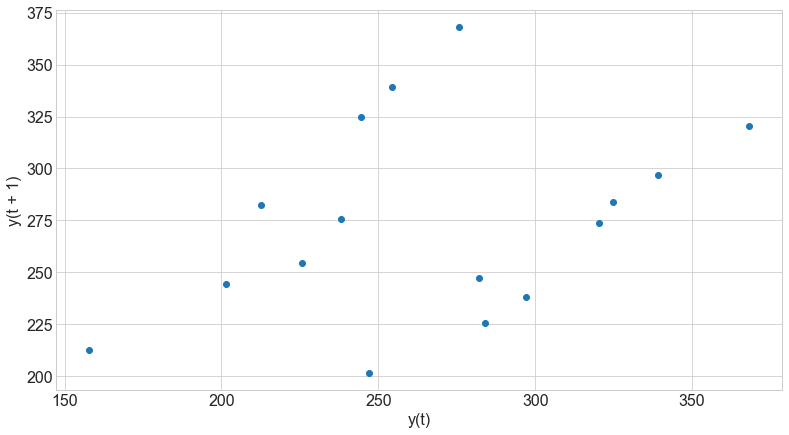

In [43]:
pd.plotting.lag_plot(train.sales_total.resample('3M').mean(), lag=1)
# this plot helps not at all

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

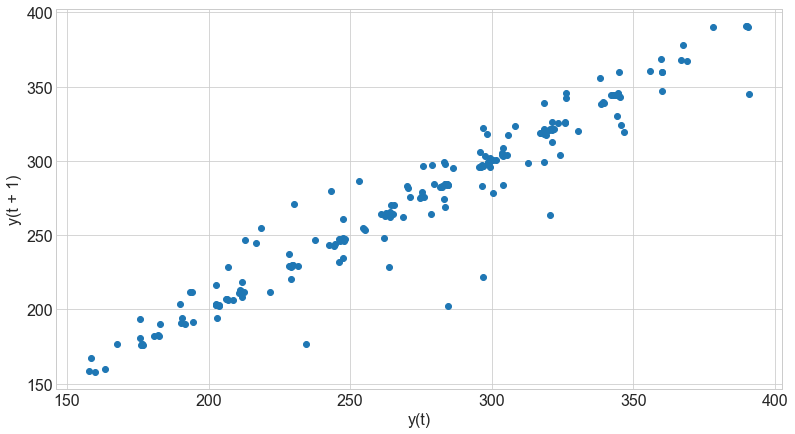

In [44]:
pd.plotting.lag_plot(train.sales_total.resample('W').mean(), lag=1)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

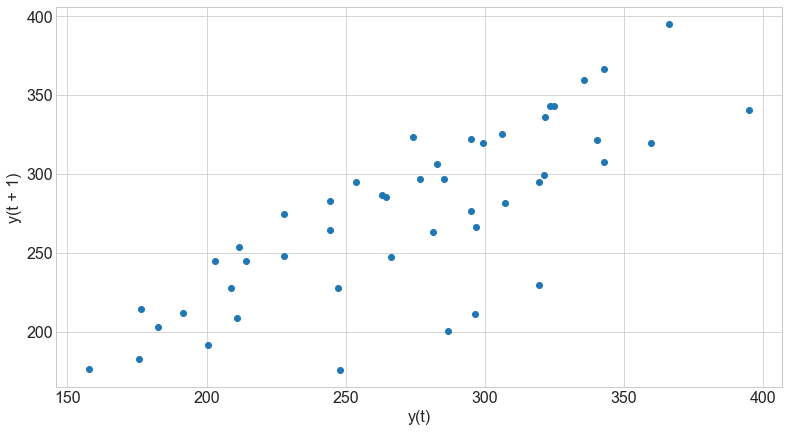

In [45]:
pd.plotting.lag_plot(train.sales_total.resample('M').mean(), lag=1)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 26)'>

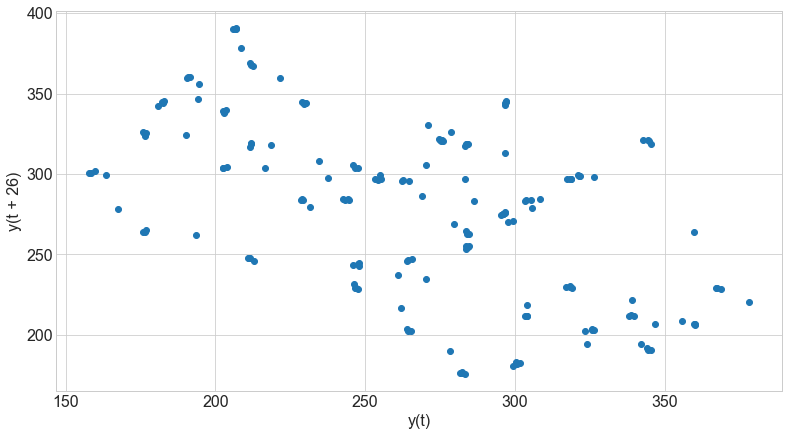

In [46]:
pd.plotting.lag_plot(train.sales_total.resample('W').mean(), lag=26)

## decompose too

# Binning by week/day and see what days have the highest sales
# or bin by price level of items and when they are purchased